In [2]:
!pip3 install yfinance
!pip3 install numpy 
!pip3 install pandas 
!pip3 install pandas_datareader
!pip3 install scipy
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
yfin.pdr_override()

In [33]:

data = pdr.DataReader('LT.NS', start='2017-01-01', end = '2022-09-08')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,904.033325,912.666687,899.433350,906.400024,805.625793,1476811
2017-01-03,906.666687,916.666687,901.466675,911.466675,810.128967,1363398
2017-01-04,916.666687,920.900024,913.666687,917.733337,815.698975,2144739
2017-01-05,921.500000,930.000000,918.666687,928.200012,825.002136,2781498
2017-01-06,930.000000,935.799988,925.066650,927.299988,824.202026,1462912
...,...,...,...,...,...,...
2022-09-01,1905.000000,1930.500000,1892.099976,1912.949951,1908.645752,2014905
2022-09-02,1900.500000,1958.800049,1900.250000,1940.500000,1936.133789,3201140
2022-09-05,1947.949951,1972.750000,1942.099976,1968.349976,1963.921143,2474746


In [35]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,904.033325,912.666687,899.433350,906.400024,805.625793,1476811
2017-01-03,906.666687,916.666687,901.466675,911.466675,810.128967,1363398
2017-01-04,916.666687,920.900024,913.666687,917.733337,815.698975,2144739
2017-01-05,921.500000,930.000000,918.666687,928.200012,825.002136,2781498
2017-01-06,930.000000,935.799988,925.066650,927.299988,824.202026,1462912


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1405 entries, 2017-01-02 to 2022-09-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1405 non-null   float64
 1   High       1405 non-null   float64
 2   Low        1405 non-null   float64
 3   Close      1405 non-null   float64
 4   Adj Close  1405 non-null   float64
 5   Volume     1405 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.8 KB


In [37]:
prices = data['Adj Close']
prices

Date
2017-01-02     805.625793
2017-01-03     810.128967
2017-01-04     815.698975
2017-01-05     825.002136
2017-01-06     824.202026
                 ...     
2022-09-01    1908.645752
2022-09-02    1936.133789
2022-09-05    1963.921143
2022-09-06    1957.884888
2022-09-07    1953.694214
Name: Adj Close, Length: 1405, dtype: float64

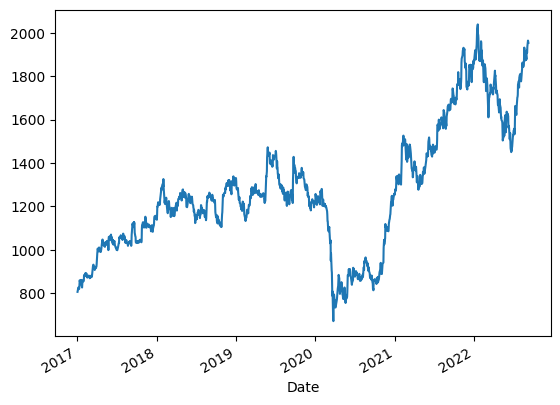

In [38]:
prices.plot()
plt.show()

In [39]:
prices = prices.to_frame()

In [40]:
prices['7_Day_MA'] = (prices['Adj Close'] + prices['Adj Close'].shift(1) + prices['Adj Close'].shift(2) + prices['Adj Close'].shift(3) + prices['Adj Close'].shift(4) + prices['Adj Close'].shift(5) + prices['Adj Close'].shift(6))/7
prices

,Adj Close,7_Day_MA
Date,,
2017-01-02,805.625793,NaN
2017-01-03,810.128967,NaN
2017-01-04,815.698975,NaN
2017-01-05,825.002136,NaN
2017-01-06,824.202026,NaN
...,...,...
2022-09-01,1908.645752,1891.541539
2022-09-02,1936.133789,1900.585414
2022-09-05,1963.921143,1911.275582


In [51]:
tickers = ['LT.NS','^NSEI']
data3 = pd.DataFrame()
for t in tickers:
  data3[t] = pdr.DataReader(t, start='2017-01-01', end='2022-09-08')['Adj Close']


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [52]:
log_rets = np.log(data3/data3.shift(1))
log_rets

,LT.NS,^NSEI
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.005574,0.001558
2017-01-04,0.006852,-0.000214
2017-01-05,0.011341,0.010119
2017-01-06,-0.000970,-0.003632
...,...,...
2022-09-01,-0.004980,-0.012266
2022-09-02,0.014299,-0.000191
2022-09-05,0.014250,0.007178


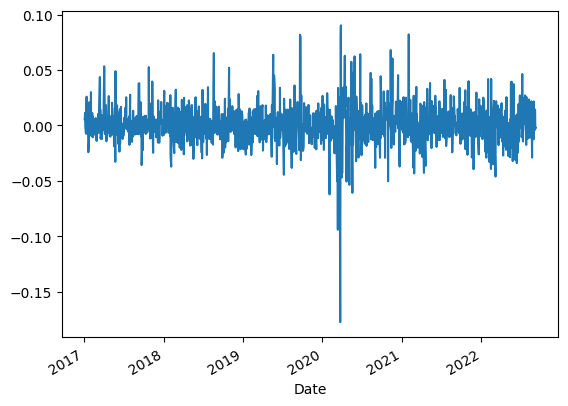

In [53]:
log_rets['LT.NS'].plot()
plt.show()

On average, the stockmarket opens on 250 days in a year

In [54]:
cov = log_rets.cov()*250
cov

,LT.NS,^NSEI
LT.NS,0.076844,0.036262
^NSEI,0.036262,0.034101


In [55]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.03626226151791494

In [56]:
market_var = log_rets['^NSEI'].var()*250
market_var

0.03410133419315076

Calculating the Beta (measure of volatility)

In [57]:
beta = cov_with_market/market_var
beta

1.0633678234559572

Calculating Risk Free Premium

In [58]:
rfm = log_rets['^NSEI'].mean()*250
rfm

0.13487473643932607

In [59]:
exp_ret = 0.0675 + beta*(rfm - 0.0675)
exp_ret

0.13914412684340494

Sharpe Ratio

In [60]:
sr = (exp_ret - 0.0675)/(log_rets['LT.NS'].std()*250**0.5)
sr

0.2584502246782305

Monte Carlo Simulation of L&T Stock

In [61]:
from scipy.stats import norm
mean_d = log_rets['LT.NS'].mean()
var_d = log_rets['LT.NS'].var()

#drift = avg daily return + 1/2(Variance)

drift = mean_d + 0.5*var_d
drift

0.0007846400484274273

In [62]:
std = log_rets['LT.NS'].std()

drift = np.array(drift)
std = np.array(std)

In [63]:
t_interval = 1000
iterations = 10
x = np.random.rand(t_interval, iterations)

daily_returns = np.exp(drift + std*norm.ppf(x))

In [64]:
S0 = data3['LT.NS'].iloc[-1]
price = np.zeros_like(daily_returns)
price[0] = S0
price

array([[1953.69421387, 1953.69421387, 1953.69421387, ..., 1953.69421387,
        1953.69421387, 1953.69421387],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

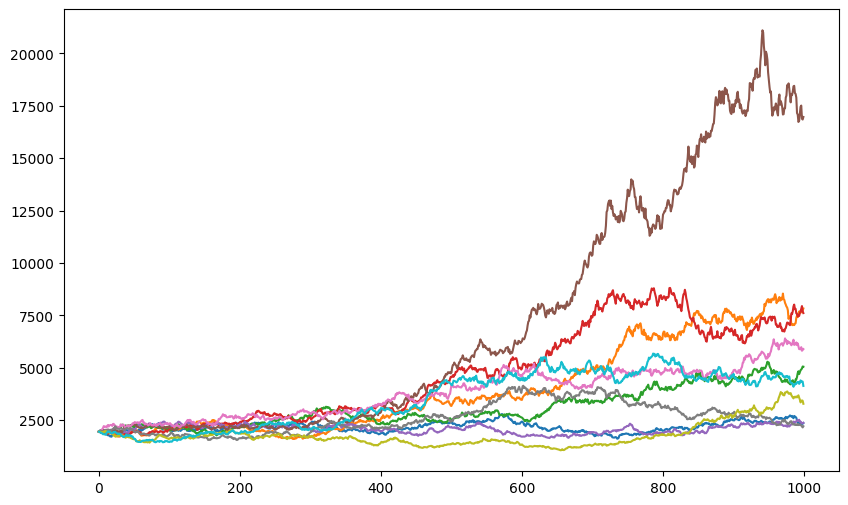

In [67]:
for t in range (1, t_interval):
    price[t] = price[t-1]*daily_returns[t]
    
plt.figure(figsize = (10,6))
plt.plot (price)

Fin.